In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [2]:
df = pd.read_csv('Cleaned.csv')

In [3]:
X = df[['Sex','IFCCA1', 'OmDiast', 'OmSyst', 'HDLChol', 'Cholest', 'BMI']]
y = df['Diabetes']

X = pd.get_dummies(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracyRF = accuracy_score(y_test, y_pred)
mccRF = matthews_corrcoef(y_test, y_pred)
roc_aucRF = roc_auc_score(y_test, y_pred)
precisionRF = precision_score(y_test, y_pred)
recallRF = recall_score(y_test, y_pred)
f1RF = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracyRF)
print("Matthews Correlation Coefficient (MCC):", mccRF)
print("ROC-AUC Score:", roc_aucRF)
print("Precision:", precisionRF)
print("Recall:", recallRF)
print("F1 Score:", f1RF)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9097091262357849
Matthews Correlation Coefficient (MCC): 0.17058984982581046
ROC-AUC Score: 0.5471452224444471
Precision: 0.38588235294117645
Recall: 0.11058664868509778
F1 Score: 0.1719077568134172

Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.11      0.17      1483
           2       0.92      0.98      0.95     16016

    accuracy                           0.91     17499
   macro avg       0.65      0.55      0.56     17499
weighted avg       0.88      0.91      0.89     17499



In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize MLPClassifier (Neural Network)
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute predictions probabilities for ROC-AUC score
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute evaluation metrics
accuracyNL = accuracy_score(y_test, y_pred)
mccNL = matthews_corrcoef(y_test, y_pred)
roc_aucNL = roc_auc_score(y_test, y_pred)
precisionNL = precision_score(y_test, y_pred)
recallNL = recall_score(y_test, y_pred)
f1NL = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracyNL)
print("Matthews Correlation Coefficient (MCC):", mccNL)
print("ROC-AUC Score:", roc_aucNL)
print("Precision:", precisionNL)
print("Recall:", recallNL)
print("F1 Score:", f1NL)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9205
Matthews Correlation Coefficient (MCC): 0.2317710716418805
ROC-AUC Score: 0.5426167327811294
Precision: 0.7074829931972789
Recall: 0.08858603066439523
F1 Score: 0.15745647236941712

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.09      0.16      1174
           2       0.92      1.00      0.96     12826

    accuracy                           0.92     14000
   macro avg       0.82      0.54      0.56     14000
weighted avg       0.90      0.92      0.89     14000



In [7]:
clf = SVC(kernel='rbf', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute evaluation metrics
accuracySVC = accuracy_score(y_test, y_pred)
mccSVC = matthews_corrcoef(y_test, y_pred)
roc_aucSVC = roc_auc_score(y_test, y_pred)
precisionSVC = precision_score(y_test, y_pred)
recallSVC = recall_score(y_test, y_pred)
f1SVC = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracySVC)
print("Matthews Correlation Coefficient (MCC):", mccSVC)
print("ROC-AUC Score:", roc_aucSVC)
print("Precision:", precisionSVC)
print("Recall:", recallSVC)
print("F1 Score:", f1SVC)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.919
Matthews Correlation Coefficient (MCC): 0.1765991195778155
ROC-AUC Score: 0.5174226861908214
Precision: 0.9761904761904762
Recall: 0.03492333901192504
F1 Score: 0.06743421052631579

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.03      0.07      1174
           2       0.92      1.00      0.96     12826

    accuracy                           0.92     14000
   macro avg       0.95      0.52      0.51     14000
weighted avg       0.92      0.92      0.88     14000



In [8]:
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute evaluation metrics
accuracyDT = accuracy_score(y_test, y_pred)
mccDT = matthews_corrcoef(y_test, y_pred)
roc_aucDT = roc_auc_score(y_test, y_pred)
precisionDT = precision_score(y_test, y_pred)
recallDT = recall_score(y_test, y_pred)
f1DT = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracyDT)
print("Matthews Correlation Coefficient (MCC):", mccDT)
print("ROC-AUC Score:", roc_aucDT)
print("Precision:", precisionDT)
print("Recall:", recallDT)
print("F1 Score:", f1DT)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8719285714285714
Matthews Correlation Coefficient (MCC): 0.13549860263707889
ROC-AUC Score: 0.5652457834929103
Precision: 0.21369102682701202
Recall: 0.196763202725724
F1 Score: 0.2048780487804878

Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.20      0.20      1174
           2       0.93      0.93      0.93     12826

    accuracy                           0.87     14000
   macro avg       0.57      0.57      0.57     14000
weighted avg       0.87      0.87      0.87     14000



In [9]:
logistic_clf = LogisticRegression(random_state=42)

# Train the model
logistic_clf.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_clf.predict(X_test)

# Compute evaluation metrics
accuracyLR = accuracy_score(y_test, y_pred)
mccLR = matthews_corrcoef(y_test, y_pred)
roc_aucLR = roc_auc_score(y_test, y_pred)
precisionLR = precision_score(y_test, y_pred)
recallLR = recall_score(y_test, y_pred)
f1LR = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracyLR)
print("Matthews Correlation Coefficient (MCC):", mccLR)
print("ROC-AUC Score:", roc_aucLR)
print("Precision:", precisionLR)
print("Recall:", recallLR)
print("F1 Score:", f1LR)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))


Accuracy: 0.8719285714285714
Matthews Correlation Coefficient (MCC): 0.13549860263707889
ROC-AUC Score: 0.5652457834929103
Precision: 0.21369102682701202
Recall: 0.196763202725724
F1 Score: 0.2048780487804878

Classification Report:
              precision    recall  f1-score   support

           1       0.46      0.02      0.03      1174
           2       0.92      1.00      0.96     12826

    accuracy                           0.92     14000
   macro avg       0.69      0.51      0.49     14000
weighted avg       0.88      0.92      0.88     14000



In [10]:
# Initialize GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_clf.predict(X_test)

# Compute evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred)
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Print evaluation metrics
print("Accuracy:", accuracy_gb)
print("Matthews Correlation Coefficient (MCC):", mcc_gb)
print("ROC-AUC Score:", roc_auc_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


Accuracy: 0.8719285714285714
Matthews Correlation Coefficient (MCC): 0.24135228500841588
ROC-AUC Score: 0.5448241713023827
Precision: 0.7266666666666667
Recall: 0.09284497444633731
F1 Score: 0.1646525679758308

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.09      0.16      1174
           2       0.92      1.00      0.96     12826

    accuracy                           0.92     14000
   macro avg       0.82      0.54      0.56     14000
weighted avg       0.91      0.92      0.89     14000



In [11]:


# Initialize KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Train the model
knn_clf.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_clf.predict(X_test)

# Compute evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred)
mcc_knn = matthews_corrcoef(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print evaluation metrics
print("Matthews Correlation Coefficient (MCC):", mcc_knn)
print("ROC-AUC Score:", roc_auc_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Matthews Correlation Coefficient (MCC): 0.19090151362431335
ROC-AUC Score: 0.5506736609065221
Precision: 0.43548387096774194
Recall: 0.11499148211243612
F1 Score: 0.18194070080862534

Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.11      0.18      1174
           2       0.92      0.99      0.95     12826

    accuracy                           0.91     14000
   macro avg       0.68      0.55      0.57     14000
weighted avg       0.88      0.91      0.89     14000



In [12]:
from tabulate import tabulate

# Define data
data = [
    ['KNN', accuracy_knn, mcc_knn, f1_knn],
    ['SVC', accuracySVC, mccSVC, f1SVC],
    ['Neural Network', accuracyNL, mccNL, f1NL],
    ['Decision Tree', accuracyDT, mccDT, f1DT],
    ['Gradient Boosting', accuracy_gb, mcc_gb, f1_gb],
    ['Logistic Regression', accuracyLR, mccLR, f1LR],
    ['Random Forest', accuracyRF, mccRF, f1RF]
]

# Create table
table = tabulate(data, headers=['Model', 'Accuracy', 'MCC', 'F1 Score'], tablefmt='pretty')

# Print table
print(table)


+---------------------+--------------------+---------------------+---------------------+
|        Model        |      Accuracy      |         MCC         |      F1 Score       |
+---------------------+--------------------+---------------------+---------------------+
|         KNN         | 0.8719285714285714 | 0.19090151362431335 | 0.18194070080862534 |
|         SVC         |       0.919        | 0.1765991195778155  | 0.06743421052631579 |
|   Neural Network    |       0.9205       | 0.2317710716418805  | 0.15745647236941712 |
|    Decision Tree    | 0.8719285714285714 | 0.13549860263707889 | 0.2048780487804878  |
|  Gradient Boosting  | 0.8719285714285714 | 0.24135228500841588 | 0.1646525679758308  |
| Logistic Regression | 0.8719285714285714 | 0.13549860263707889 | 0.2048780487804878  |
|    Random Forest    | 0.9097091262357849 | 0.17058984982581046 | 0.1719077568134172  |
+---------------------+--------------------+---------------------+---------------------+


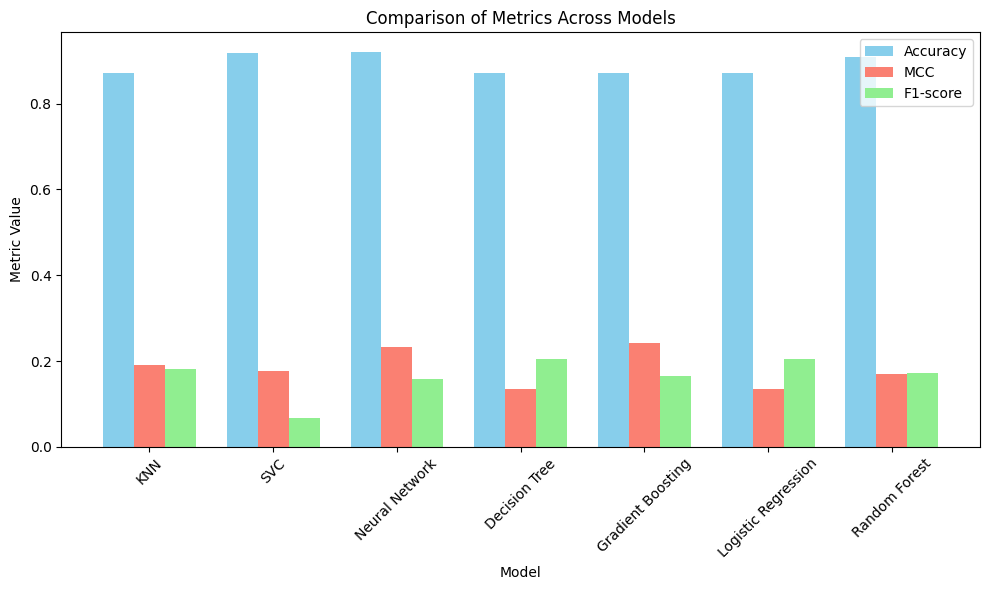

In [13]:
models = ['KNN', 'SVC', 'Neural Network', 'Decision Tree', 'Gradient Boosting', 'Logistic Regression',
                      'Random Forest']
# Define metrics
accuracy = [accuracy_knn, accuracySVC, accuracyNL, accuracyDT, accuracy_gb, accuracyLR, accuracyRF]
mcc = [mcc_knn, mccSVC, mccNL, mccDT, mcc_gb, mccLR, mccRF]
f1_score = [f1_knn, f1SVC, f1NL, f1DT, f1_gb, f1LR, f1RF]

x = np.arange(len(models))

# Define bar width
bar_width = 0.25

# Plotting
plt.figure(figsize=(10, 6))

# Plotting accuracy
plt.bar(x - bar_width, accuracy, width=bar_width, color='skyblue', label='Accuracy')

# Plotting MCC
plt.bar(x, mcc, width=bar_width, color='salmon', label='MCC')

# Plotting F1-score
plt.bar(x + bar_width, f1_score, width=bar_width, color='lightgreen', label='F1-score')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Comparison of Metrics Across Models')
plt.xticks(x, models, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()